<a href="https://colab.research.google.com/github/AkshataKishore/IML/blob/master/Eli5_PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

Mounted at /content/drive
 Advertising.html
'Akshata KM Resume.pdf'
'Akshata Resume.pdf'
 catboost_info
'Colab Notebooks'
'Data Science and Big Data Analytics.pdf'
'Document Back up Boeing '
 Epic_Data_Analysis.ipynb
 Epic_Sample.csv
 FeatureHumana.csv
 feature_importance.csv
 holdout.csv
 holdoutmodel.csv
 inputmodel.csv
 interpretable_tree.png
 modeldata.csv
'New_data (1).csv'
 New_data.csv
 NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv
 OutputResultsHumana.csv
 PCOS_Data.csv
 SWEETVIZ_REPORT.html
'UMD Textbooks'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
'USA Visa Documents'
/content/drive/My Drive


In [2]:
import time,os,json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]
import pandas as pd 
df = pd.read_csv('PCOS_Data.csv')
from sklearn.model_selection import train_test_split

target = 'PCOS (Y/N)'

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df.drop(target,axis=1), df[target],
    test_size=0.2, random_state=SEED, stratify=df[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
my_model = RandomForestClassifier(random_state=0).fit(df_Xtrain, ytrain)

In [11]:
! pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [13]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(df_Xtest, ytest)
eli5.show_weights(perm, feature_names = features_train)

Weight,Feature
0.0811 ± 0.0580,Follicle No. (R)
0.0019 ± 0.0325,Follicle No. (L)
0 ± 0.0000,Hb(g/dl)
0 ± 0.0000,BP _Diastolic (mmHg)
0 ± 0.0000,BP _Systolic (mmHg)
0 ± 0.0000,RR (breaths/min)
0.0000 ± 0.0119,Avg. F size (R) (mm)
0 ± 0.0000,Blood Group
0 ± 0.0000,Pregnant(Y/N)
-0.0019 ± 0.0302,Weight gain(Y/N)


In [16]:
perm_train = PermutationImportance(my_model, scoring='accuracy',
                                   n_iter=100, random_state=1)
# fit and see the permuation importances
perm_train.fit(df_Xtrain, ytrain)
eli5.explain_weights_df(perm_train, feature_names=features_train)

,feature,weight,std
0,Follicle No. (R),0.059811,0.008227
1,hair growth(Y/N),0.012246,0.002765
2,Skin darkening (Y/N),0.007920,0.002071
3,Weight gain(Y/N),0.004965,0.002328
4,Follicle No. (L),0.004326,0.002435
5,Weight (Kg),0.003452,0.001395
6,TSH (mIU/L),0.002199,0.000603
7,Pulse rate(bpm),0.002033,0.000820
8,AMH(ng/mL),0.001820,0.000995
9,Fast food (Y/N),0.001253,0.001180


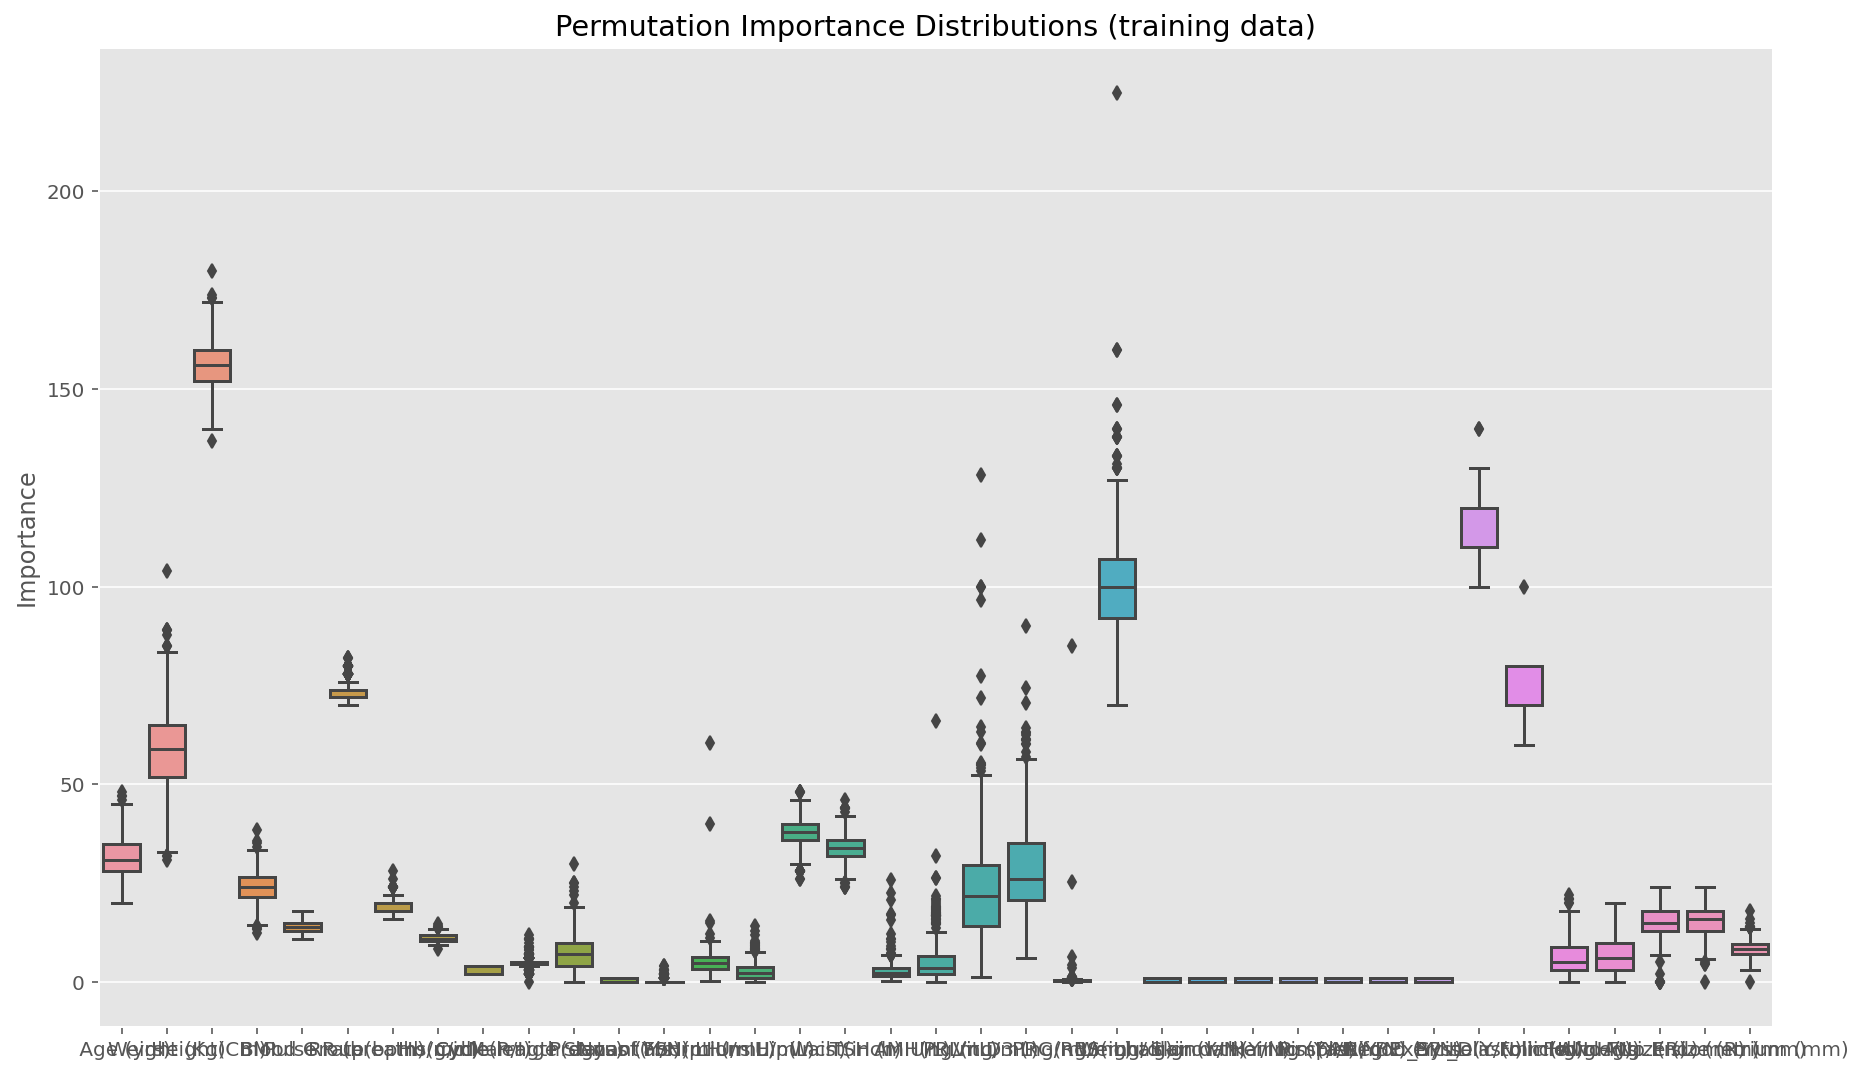

In [18]:

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,9

perm_train_df = pd.DataFrame(data=perm.results_,
                                      columns=df_Xtrain.columns)



(sns.boxplot(data=df_Xtrain)
        .set(title='Permutation Importance Distributions (training data)',
             ylabel='Importance'));

plt.show()

In [20]:
!pip  install   matplotlib 
!pip install eli5
#pdpbox has some problems in their pypi version
!pip install git+https://github.com/SauceCat/PDPbox
!pip install eli5
!pip install pycebox
!pip install ml_insights
!pip install scikit-optimize
!pip install alepython

#or
#!conda install -c conda-forge shap
!pip install shap
!pip install plotly_express
!pip install seaborn
!pip install category_encoders
!conda install -c conda-forge category_encoders
!pip install --upgrade git+https://github.com/scikit-learn-contrib/categorical-encoding
! pip install lime
!pip install graphviz  
!pip install skll

  Cloning https://github.com/SauceCat/PDPbox to /tmp/pip-req-build-rweb5gv7
  Running command git clone -q https://github.com/SauceCat/PDPbox /tmp/pip-req-build-rweb5gv7
  Created wheel for PDPbox: filename=PDPbox-0.2.0+13.g73c6966-cp36-none-any.whl size=57691683 sha256=7eec77b0b243def8c81939d0ecd9bbd87c76d05d4f8f98ae4928f0debd457f4b
  Stored in directory: /tmp/pip-ephem-wheel-cache-mar_90n6/wheels/0d/9e/75/2b0f9557dd49ca0d0ae1f28398514e6b891c3305f904b472d1
Successfully built PDPbox
  Created wheel for pycebox: filename=pycebox-0.0.1-cp36-none-any.whl size=3644 sha256=2a2e39fd3a11df55dac863d6a1aa86da35d0a85e2e68baed9e0b02208671665c
  Stored in directory: /root/.cache/pip/wheels/58/5e/65/001126ca8b1f5c71e9571d09ba579e82bb0792062e7a82e77c
Successfully built pycebox
     |████████████████████████████████| 102kB 2.4MB/s 
ERROR: Could not find a version that satisfies the requirement alepython (from versions: none)
ERROR: No matching distribution found for alepython
     |██████████████████

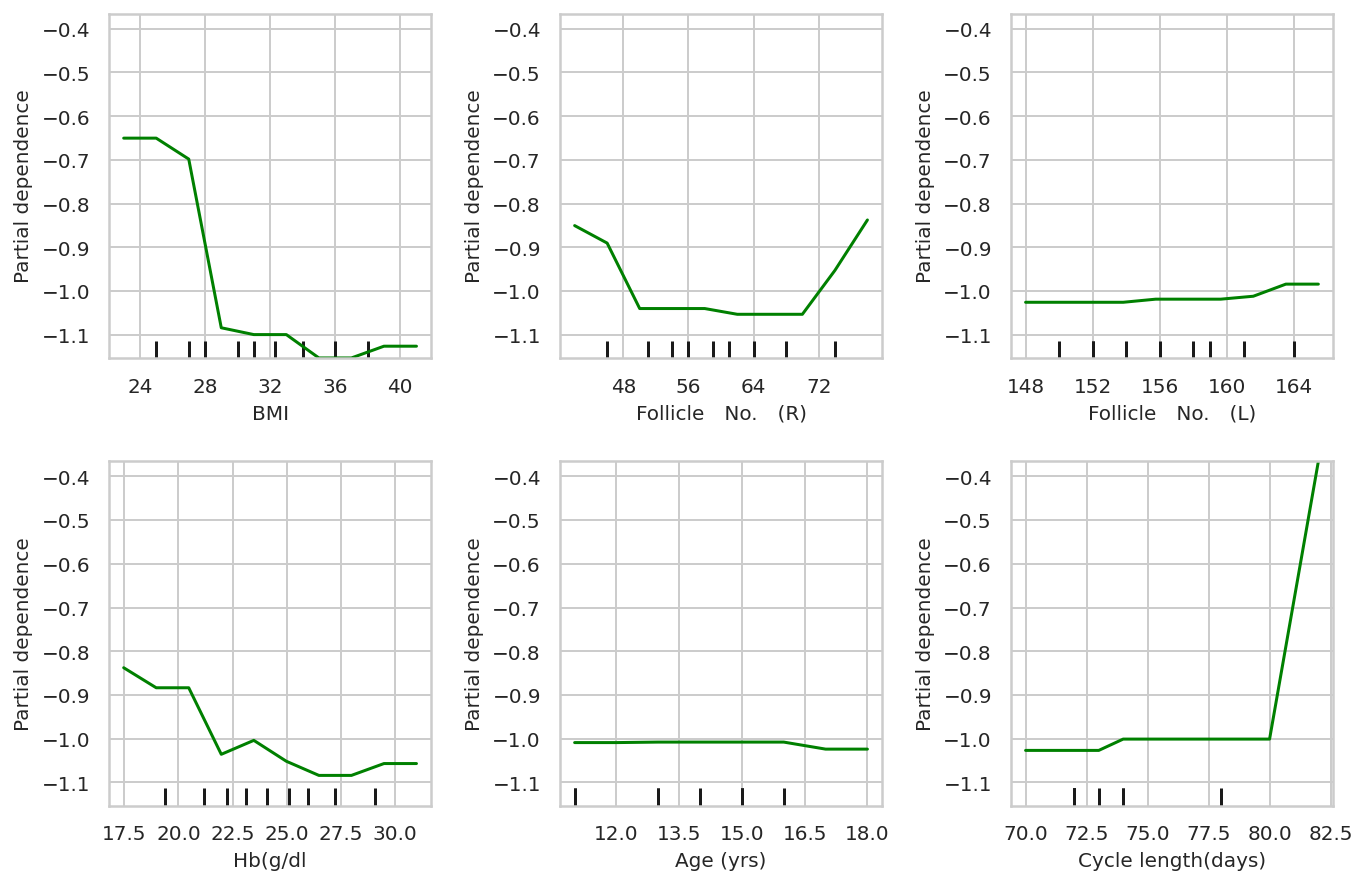

In [22]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

bg_color = (0.5, 0.5, 0.5)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "axes.titlesize":20,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':10,
            'figure.figsize':(10.0, 10.0),
            'xtick.labelsize':10,
            'ytick.labelsize':10})
sns.set_style("whitegrid")
my_model = GradientBoostingClassifier()
my_model.fit(X=df_Xtrain, y=ytrain)
# Here we make the plot
my_plots = plot_partial_dependence(my_model ,       
                                   features=[0,1, 2,3,4,5], # column numbers of plots we want to show
                                   X=df_Xtrain,            # raw predictors data.
                                   feature_names=['BMI','Follicle No. (R)', 'Follicle No. (L)','Hb(g/dl','Age (yrs)','Cycle length(days)'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis
plt.show()

In [23]:
from pycebox.ice import ice, ice_plot

# pcyebox likes the data to be in a DataFrame so let's create one with our imputed data
# we first need to impute the missing data
train_X_df = pd.DataFrame(df_Xtrain, columns=df.columns)

<Figure size 1080x720 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


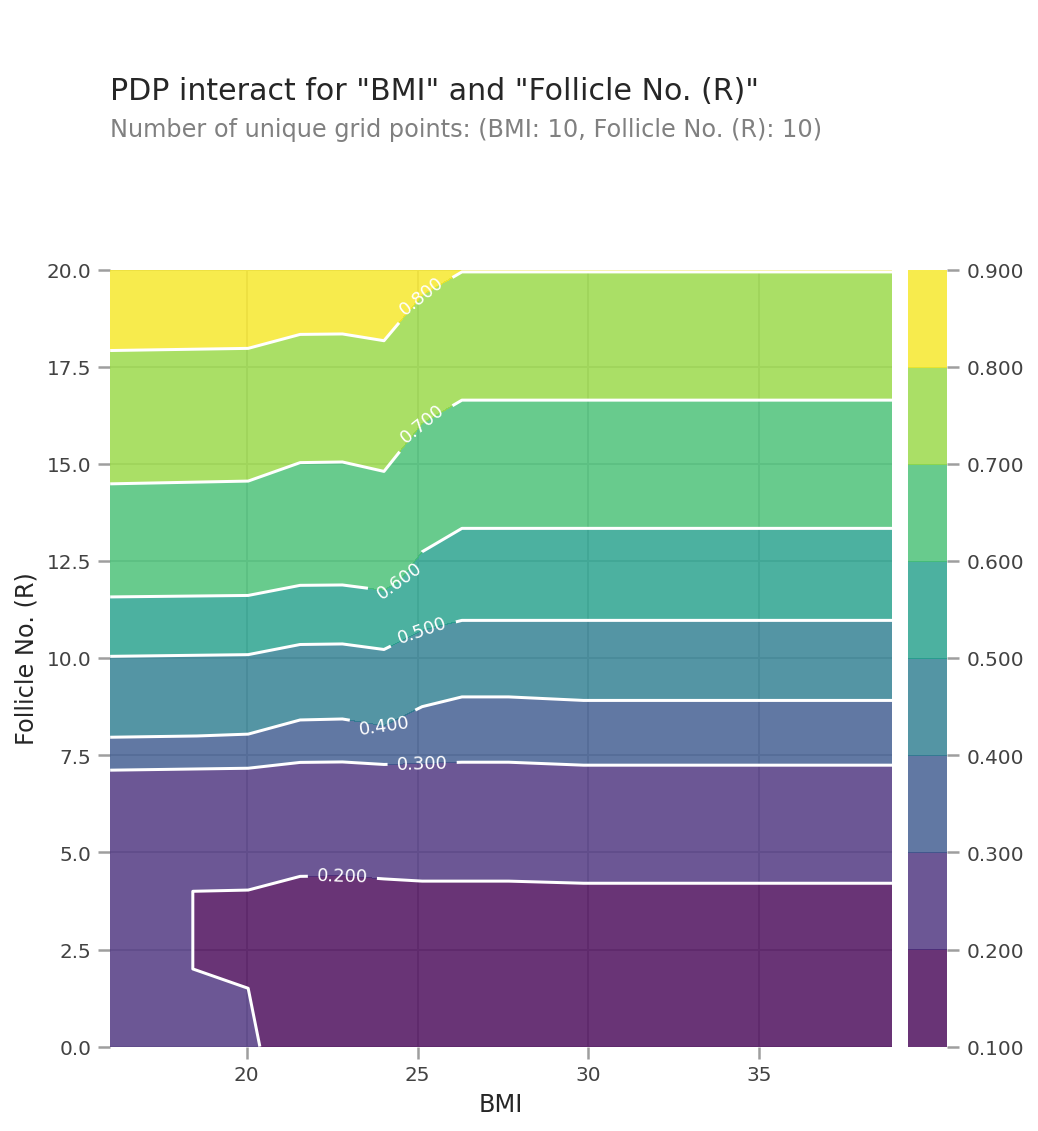

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=my_model, dataset=df_Xtest, model_features=df_Xtest.columns.tolist(), features=['BMI', 'Follicle No. (R)'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['BMI', 'Follicle No. (R)'], plot_type='contour')
plt.show()

<Figure size 1080x720 with 0 Axes>

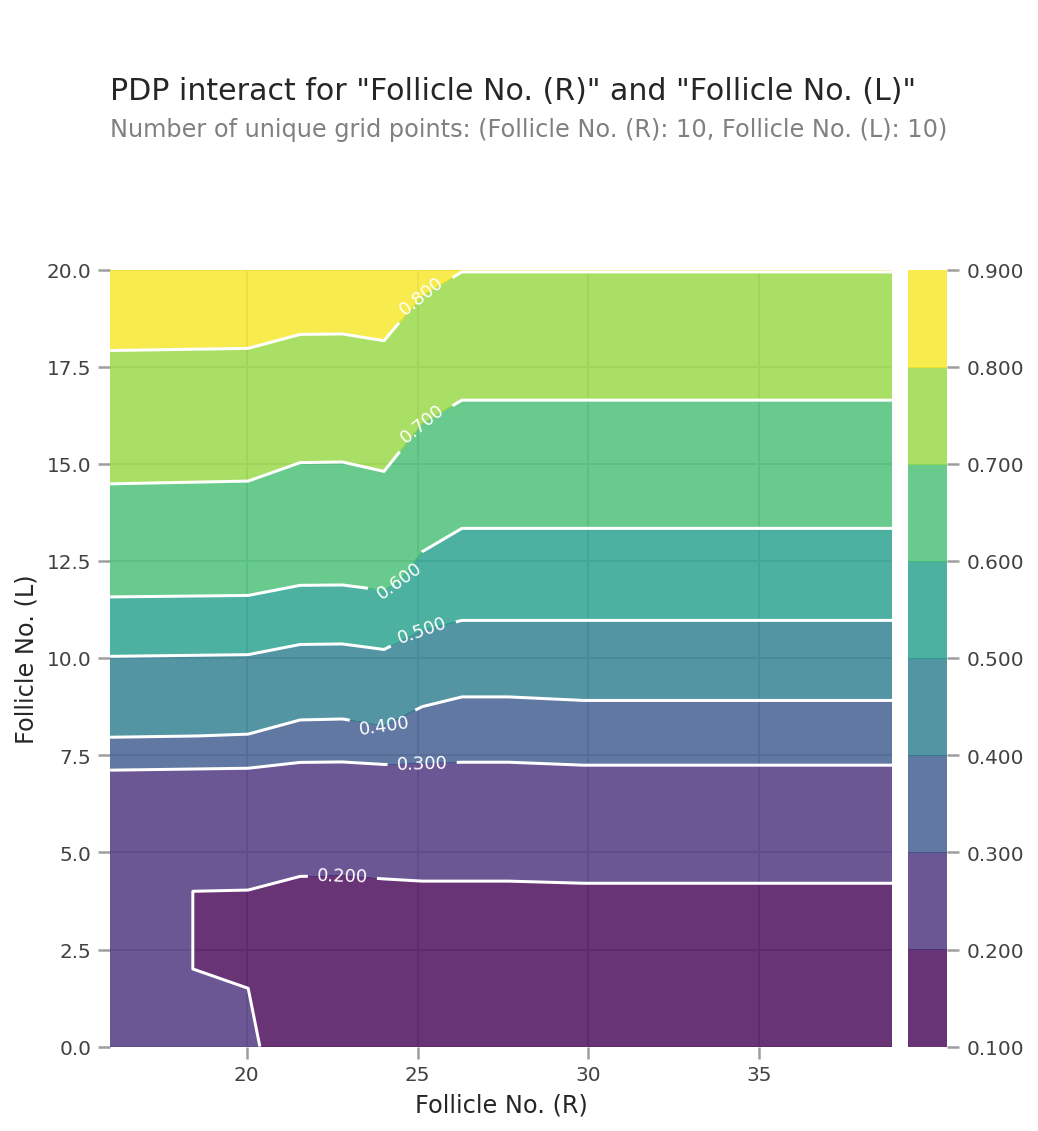

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=my_model, dataset=df_Xtest, model_features=df_Xtest.columns.tolist(), features=['BMI', 'Follicle No. (R)'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['Follicle No. (R)', 'Follicle No. (L)'], plot_type='contour')
plt.show()

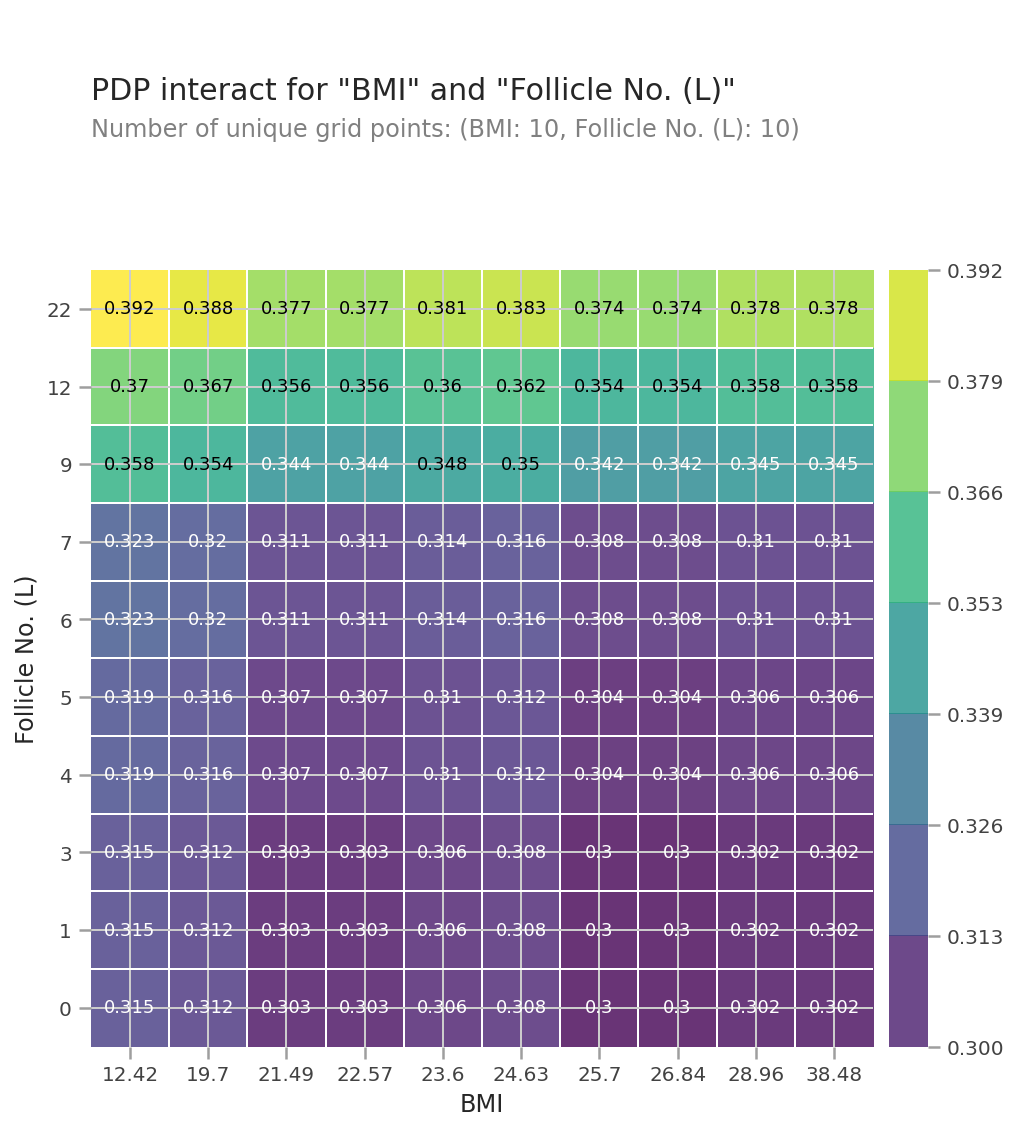

In [36]:
features_to_plot = ['BMI', 'Follicle No. (L)']
inter1  =  pdp.pdp_interact(model=my_model, dataset=df_Xtrain, model_features=features_train, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1,feature_names=features_to_plot, plot_type='grid')

# we use plot_type='grid' as the default and better option 'contour' has a bug which is being corrected
# cf. https://github.com/SauceCat/PDPbox/issues/40

plt.show()